In [1]:


import sys

assert sys.version_info >= (3, 7)



In [2]:


from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")



In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [4]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


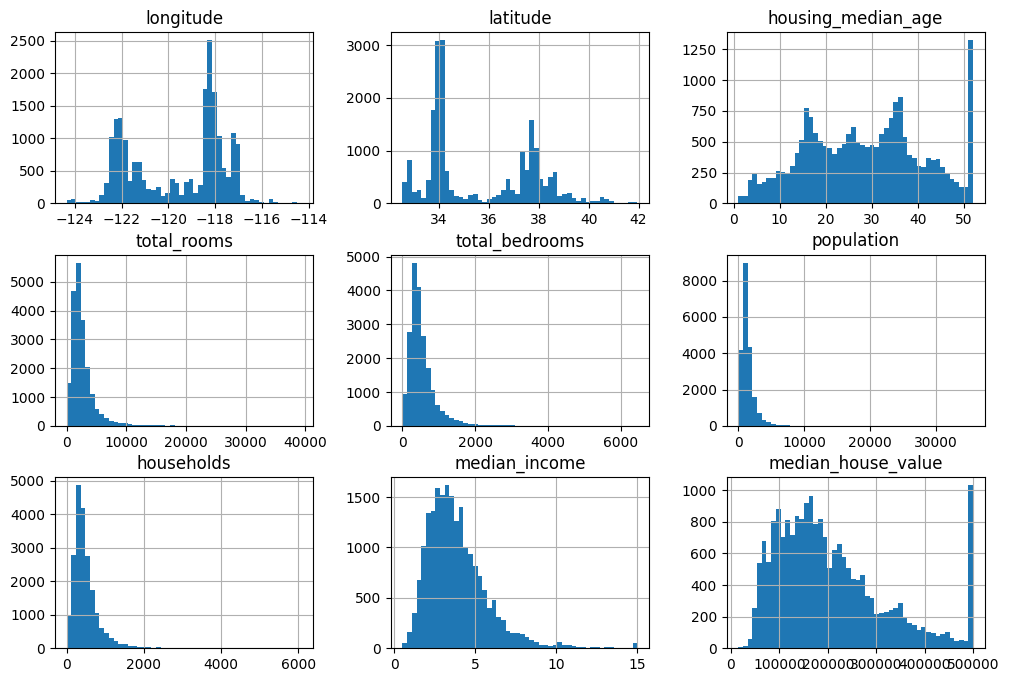

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12,8))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = .2, random_state=42)


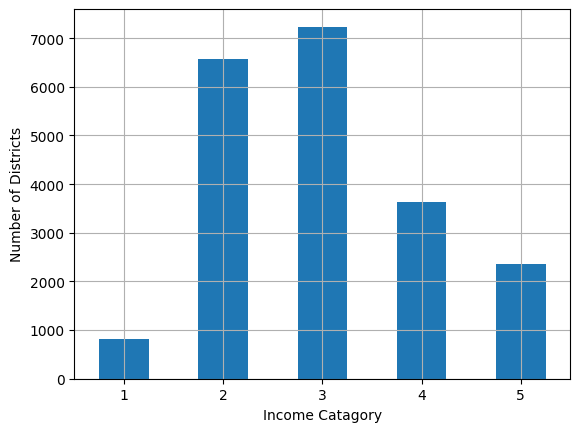

In [9]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"], bins= [0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Catagory")
plt.ylabel("Number of Districts")
plt.show()

In [10]:
strat_train_set, strat_test_set = train_test_split(housing, test_size = .2, stratify=housing["income_cat"], random_state=42)

In [11]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [12]:
housing["income_cat"].value_counts() / len(housing)


income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [13]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis =1, inplace= True)


In [14]:
housing_original = strat_train_set.copy()

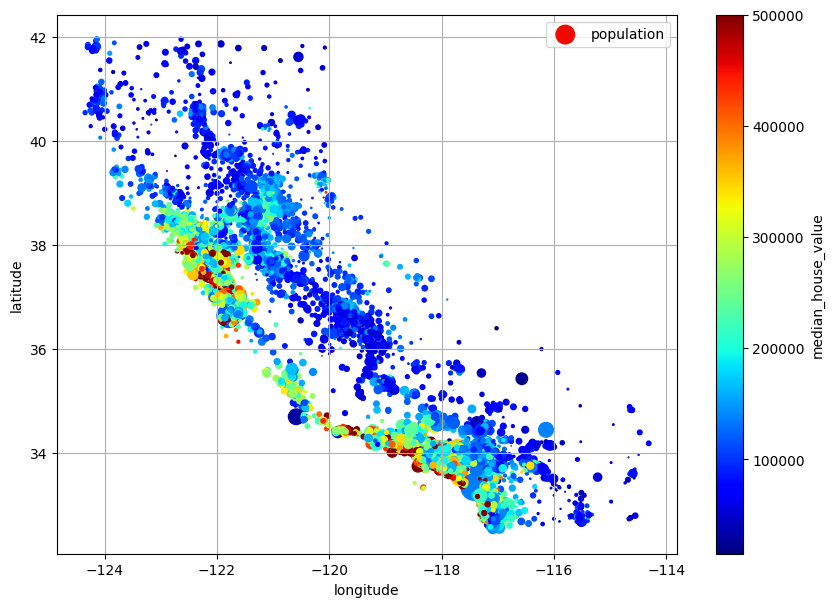

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid= True, s=housing["population"]/100, label="population", c="median_house_value", cmap="jet", legend = True, figsize= (10,7), sharex=False)
plt.show()

In [16]:
housing1 = housing.drop(["ocean_proximity", "income_cat"], axis =1)
correlation = housing1.corr()

In [17]:

correlation["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

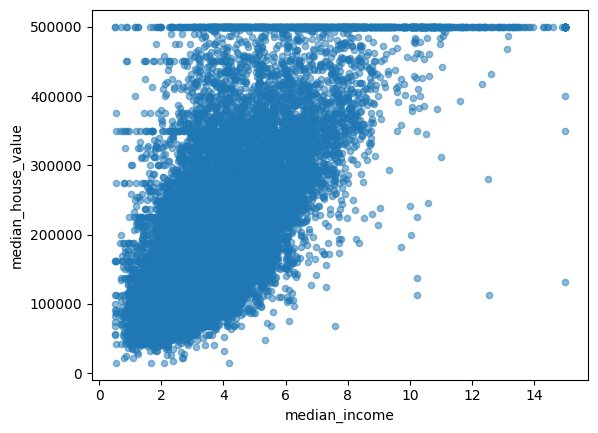

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha = .5)

In [19]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [20]:
housing = strat_train_set.drop(["median_house_value"], axis= 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include = [np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [22]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
index=housing_num.index)


In [23]:
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8]




array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [24]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [25]:
from sklearn.preprocessing import OneHotEncoder
hot_encoded = OneHotEncoder()
housing_cat_hot = hot_encoded.fit_transform(housing_cat)
hot_encoded.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [26]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range =(-1,1))
housing_num_scaled = min_max_scaler.fit_transform(housing_num)

In [27]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self # always return self!
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([("impute", SimpleImputer(strategy="median")),("standardized", StandardScaler())])

this is good because it standarizes the data and fills in the nan values with the median values. can apply it to your data using the fit_transformr method.

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
num_attribs = ["longitude", "latitude", "population", "housing_median_age", "total_bedrooms", "total_rooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

num_pipeline = make_pipeline(SimpleImputer(strategy = "median"), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy = "most_frequent"), OneHotEncoder())

processed = ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", cat_pipeline, cat_attribs)])

y= processed.fit_transform(housing)

processed.get_feature_names_out()

array(['num__longitude', 'num__latitude', 'num__population',
       'num__housing_median_age', 'num__total_bedrooms',
       'num__total_rooms', 'num__population', 'num__households',
       'num__median_income', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN'],
      dtype=object)

Say you want to do the categorical data and the numerical data at the same time, you can do something like this. make_pipeline is the same thing as Pipeline but you do not need to name your data.

In [30]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]
def ratio_name(function_transformer, feature_names_in):
    return ["ratio"] # feature names out
def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
StandardScaler())
preprocessing = ColumnTransformer([
("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
("people_per_house", ratio_pipeline(), ["population", "households"]),
("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
"households", "median_income"]),
("geo", cluster_simil, ["latitude", "longitude"]),
("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
remainder=default_num_pipeline)

housing_prepared = preprocessing.fit_transform(housing)



Normalizes all the data so the model can learn evenly.

In [31]:
from sklearn.linear_model import LinearRegression
regressed_model = make_pipeline(preprocessing, LinearRegression())
regressed_model.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022A9B1A4910>)])),
                ('linearregression', LinearRegression())])

In [32]:
housing_predict = regressed_model.predict(housing)
housing_predict[:5].round(2)


array([245970.16, 372738.07, 135706.8 ,  91440.93, 330873.54])

In [33]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

linear regression predictition is off. Lets try and add RMSE

In [34]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(housing_labels, housing_predict)
rmse1 = np.sqrt(rmse)
print("RMSE:", rmse1)



RMSE: 68972.88910758478


In [35]:
from sklearn.tree import DecisionTreeRegressor
tree_regress = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_regress.fit(housing, housing_labels)
regressed_predict = tree_regress.predict(housing)
regressed_predict[:5]

tree_mse = mean_squared_error(housing_labels, regressed_predict)

rsme= np.sqrt(tree_mse)
rsme


0.0

In [36]:
housing_labels.head()

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64

In [37]:
from sklearn.model_selection import cross_val_score
tree_rmses = cross_val_score(tree_regress, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
positive_tree_rmses = -tree_rmses
pd.Series(positive_tree_rmses).describe()

count       10.000000
mean     66573.734600
std       1103.402323
min      64607.896046
25%      66204.731788
50%      66388.272499
75%      66826.257468
max      68532.210664
dtype: float64

In [38]:
from sklearn.ensemble import RandomForestRegressor
rfr = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
rfrvalidation = cross_val_score(rfr, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=3)
rfrpos = - rfrvalidation
pd.Series(rfrpos).describe()

count        3.000000
mean     47788.843700
std        392.832297
min      47343.387616
25%      47640.419350
50%      47937.451083
75%      48011.571741
max      48085.692399
dtype: float64

In [39]:
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline([("processed", preprocessing), ("randomforest", RandomForestRegressor(random_state=42))])
param_grid = [{ 'processed__geo__n_clusters': [5, 8, 10],'randomforest__max_features': [4, 6, 8]}, {'processed__geo__n_clusters': [10, 15], 'randomforest__max_features': [6, 8, 10]}]
tuning = GridSearchCV(pipeline, param_grid, scoring='neg_root_mean_squared_error', cv=3)
tuning.fit(housing, housing_labels)
tuning.best_params_

{'processed__geo__n_clusters': 15, 'randomforest__max_features': 6}

tuning the hyperparameters

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = [{"processed__geo__n_clusters":randint(low=3, high=50)}, {"randomforest__max_features" : randint(low=2, high=20)}]
rnd_search = RandomizedSearchCV(pipeline, param_distributions = param_dist, n_iter =10, cv=3, scoring="neg_root_mean_squared_error", random_state=42)
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('processed',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out=...
                                             ('randomforest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions=[{'processed__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022A99261950>},
                                        {'randomforest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022A9A9A4250>}],
                   random_state=42, scoring='neg_root_mean_squared_error')

In [43]:
final_model = rnd_search.best_estimator_
feature_importance = final_model["randomforest"].feature_importances_


In [46]:
sorted(zip(feature_importance, final_model["processed"].get_feature_names_out()), reverse= True)

[(0.22121518571568094, 'log__median_income'),
 (0.09568045167796584, 'cat__ocean_proximity_INLAND'),
 (0.0739037919913937, 'bedrooms__ratio'),
 (0.06601663082450515, 'people_per_house__ratio'),
 (0.0656574872177898, 'geo__Cluster 5 similarity'),
 (0.05930909662039899, 'rooms_per_house__ratio'),
 (0.049168873649213234, 'geo__Cluster 2 similarity'),
 (0.04126405378271583, 'geo__Cluster 4 similarity'),
 (0.041051313207847745, 'geo__Cluster 1 similarity'),
 (0.03544943426008456, 'geo__Cluster 7 similarity'),
 (0.03488971040884441, 'geo__Cluster 6 similarity'),
 (0.03354801158828331, 'geo__Cluster 0 similarity'),
 (0.033452883062881036, 'geo__Cluster 3 similarity'),
 (0.03073962451372345, 'geo__Cluster 8 similarity'),
 (0.030611116623961102, 'geo__Cluster 9 similarity'),
 (0.020619748590560864, 'remainder__housing_median_age'),
 (0.012446523919380949, 'log__total_rooms'),
 (0.010915866051862028, 'log__population'),
 (0.0109055312356734, 'cat__ocean_proximity_<1H OCEAN'),
 (0.010342233950625

In [51]:
X_test = strat_test_set.drop(["median_house_value"], axis= 1)
y_test = strat_test_set["median_house_value"].copy()
final_model1 = final_model.predict(X_test)
mse = mean_squared_error(y_test, final_model1)
rmse = np.sqrt(mse)
rmse

43534.00926495604

In [54]:
import joblib
joblib.dump(final_model, "california_housing_predictions.pkl")

['california_housing_predictions.pkl']

In [57]:
new_data = pd.DataFrame([{
    "longitude": -122.3,
    "latitude": 37.8,
    "housing_median_age": 30.0,
    "total_rooms": 5000.0,
    "total_bedrooms": 1000.0,
    "population": 1500.0,
    "households": 400.0,
    "median_income": 4.5,
    "ocean_proximity": "NEAR BAY"
}]) 
prediction = final_model.predict(new_data)
prediction

array([225998.])